# Assignment 1

Dear students, you have successfully cloned the repo. Great! :)

This assignment includes a warm-up task "Image_I/O" and the task "Color spaces and morphological operators" from the first lecture.

## Task 0 - Image-I/O

There are several python libraries for reading and displaying images. I recommend scikit-image. Execute the next cell and install missing libraries like scikit-image. 

In [1]:
# imports
%matplotlib inline
from skimage import io, data, color
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

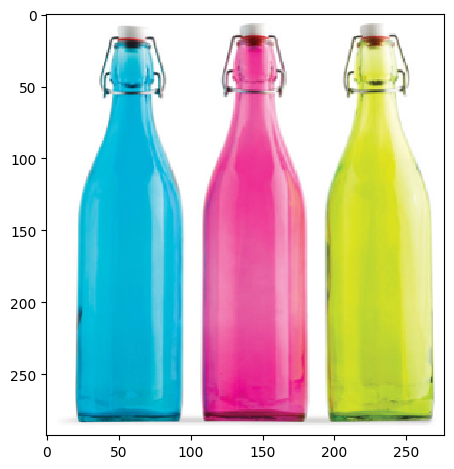

In [5]:
image = io.imread('images/bottles.png')
io.imshow(image)

By the way, there are many test images in skimage.data that you can use for your tasks. Execute the next two cells. 

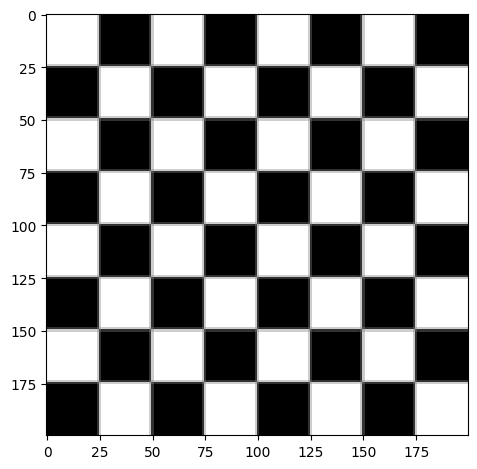

In [6]:
io.imshow(data.checkerboard())

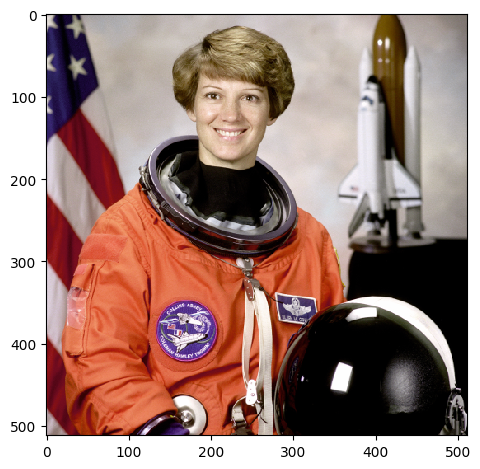

In [7]:
io.imshow(data.astronaut())

Add a line of code to the next cell to display 440 <= x <= 540 and 250 <= y <= 390 for the dog image!

In [ ]:
# code here

Now convert the color image to a grayscale image and display it!

In [ ]:
# code here

There are other color spaces. For example, HSV will be used in the lecture. Convert your image to HSV and display the H-channel.

In [ ]:
# code here

Did you know that HSV now allows creating robust (i.e. lighting independent) color histograms? Create one with Matplotlib!

In [5]:
# plt.

## Task 1 - Color Spaces and Morphological Operators

### Task 1.1

For an image of your choice, implement the simple binarization method as shown in the lecture. We've put an example image in `/images`.

* Define the „positive“ subspace P in the RGB cube
* Iterate over all pixels in I and check if in P or ~P
* Write result to new image
* Play around with size and shape of P and display binary image (**RESULT**)

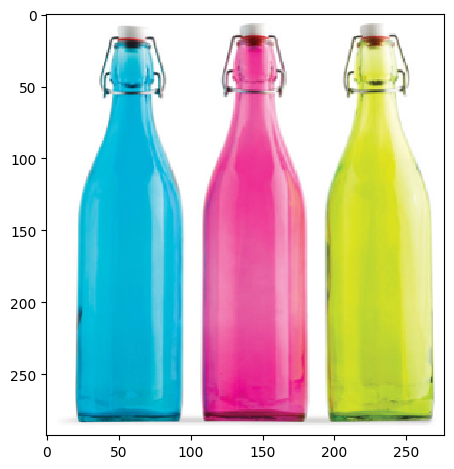

In [8]:
image = io.imread('images/bottles.png')
io.imshow(image)

### Task 1.2

* Take your binary color detection image
* Erase noise with an erosion operation
* Dilate once to get original size of object
* Find connected components with the two-pass algorithm
* Extract the bounding box on the fly
* Draw the bounding box on original image (**RESULT**)

In [ ]:
# code here

### Task 1.3

* Use your color detection and connected components algorithm
* Implement simplest tracking algorithm
* Draw history of all previous points on the frame (**RESULT**)

(see images/racecar or images/taco for sample image sequences)

In [ ]:
# code here

### Task 1.4 (BONUS)

* Find connected components using a one-pass algorithm in your image from Task 1.2
* Plot the resulting image and compare it to the result of your two-pass implementation (**RESULT**)

In [ ]:
# code here

## Congratz, you made it! :)